In [1]:
from numpy import cos, sin, pi,  arange
import matplotlib.pyplot as plt
import numpy as np

sample_rate = 100.0
nsamples = 400 # fixed at 11.11.2020
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

In [2]:
# voltage offset
#x[200:] += 2.0

In [ ]:
# single jump
x = np.zeros(400,)
x[200] = 1

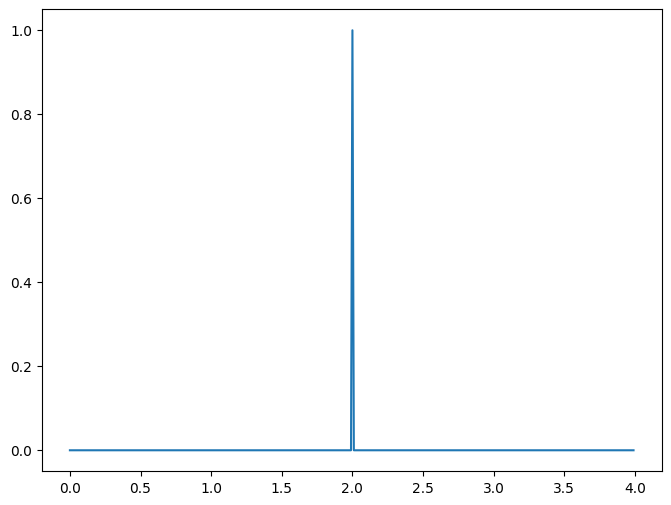

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(t, x)

/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


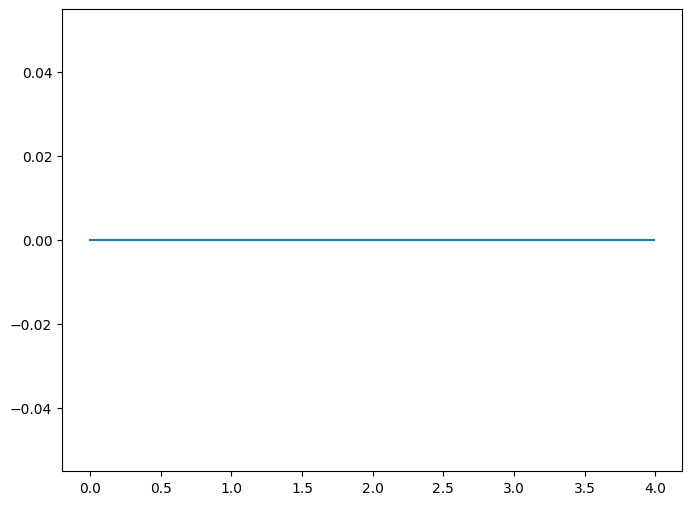

In [5]:
fft_x = np.fft.fft(x)
plt.figure(figsize=(8, 6))
plt.plot(t, np.log10(fft_x))

In [6]:
mag = np.abs(fft_x)
angle = np.angle(fft_x)

In [7]:
mag[30:370] = 0
fft_x = mag * np.exp(1j*angle)
x_filtered = np.fft.ifft(fft_x)

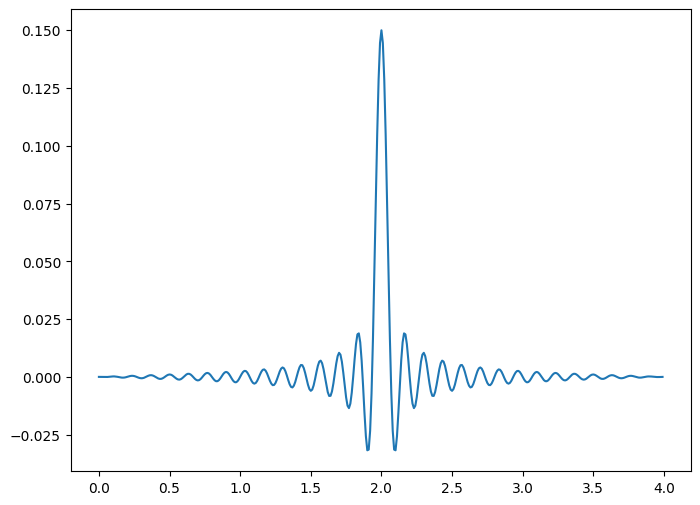

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(t, x_filtered)

In [9]:
fft_x = np.fft.fft(x)
mag = np.abs(fft_x)
angle = np.angle(fft_x)
mag[0:20] = 0
mag[-20:-1] = 0
fft_x = mag * np.exp(1j*angle)
x_filtered = np.fft.ifft(fft_x)

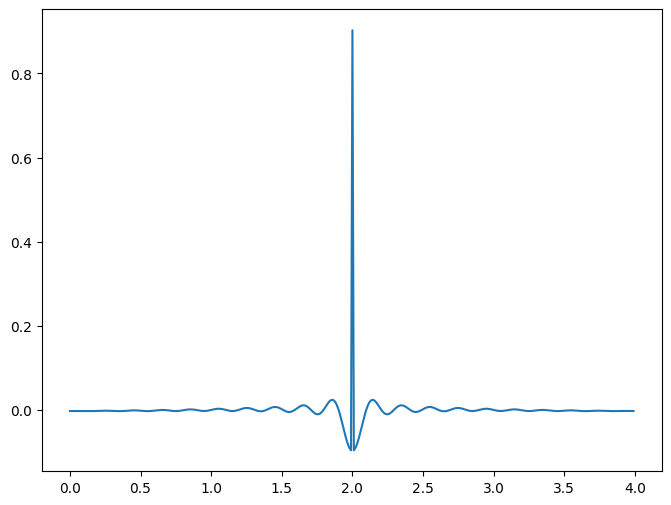

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(t, x_filtered)

# Load BIDS data

In [11]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib

import sys
sys.path.insert(0,'.')
import ccs_eeg_utils

bids_root = '/Users/jan/Meine Ablage (j.hagnberger@gmail.com)/4. Semester DSAI/EEG/data/bids'
subject_id = '030'


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()


Reading /Users/jan/Meine Ablage (j.hagnberger@gmail.com)/4. Semester DSAI/EEG/data/bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt
Reading events from /Users/jan/Meine Ablage (j.hagnberger@gmail.com)/4. Semester DSAI/EEG/data/bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values.Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> res

/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_17441/3414052146.py:16: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)
/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_17441/3414052146.py:16: RuntimeWarning: "ARS" is not a BIDS-acceptable coordinate frame for EEG. The supported coordinate frames are: ['ICBM452AirSpace', 'ICBM452Warp5Space', 'IXI549Space', 'fsaverage', 'fsaverageSym', 'fsLR', 'MNIColin27', 'MNI152Lin', 'MNI152NLin2009aSym', 'MNI152NLin2009bSym', 'MNI152NLin2009cSym', 'MNI152NLin2009aAsym', 'MNI152NLin2009bAsym', 'MNI152NLin2009cAsym', 'MNI152NLin6Sym', 'MNI152NLin6ASym', 'MNI305', 'NIHPD', 'OASIS30AntsOASISAnts', 'OASIS30Atropos', 'Talairach', 'UNCInfant', 'fsaverage3', 'fsaverage4', 'fsaverage5', 'fsaverage6', 'fsaveragesym', 'UNCInfant0V21', 'UNCInfant1V21', 'UNCInfant2V21', 'UN

<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MiB, data loaded>

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_17441/2820817313.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pz_ch.compute_psd().plot();
/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


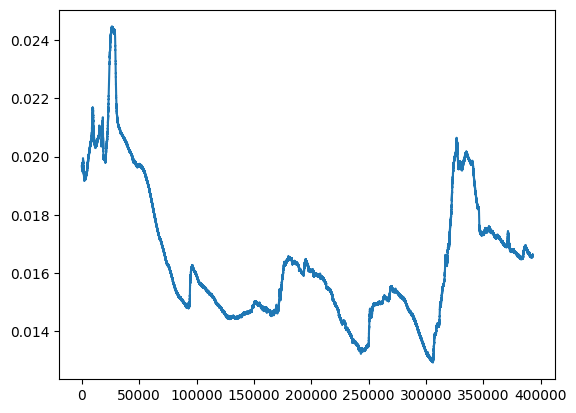

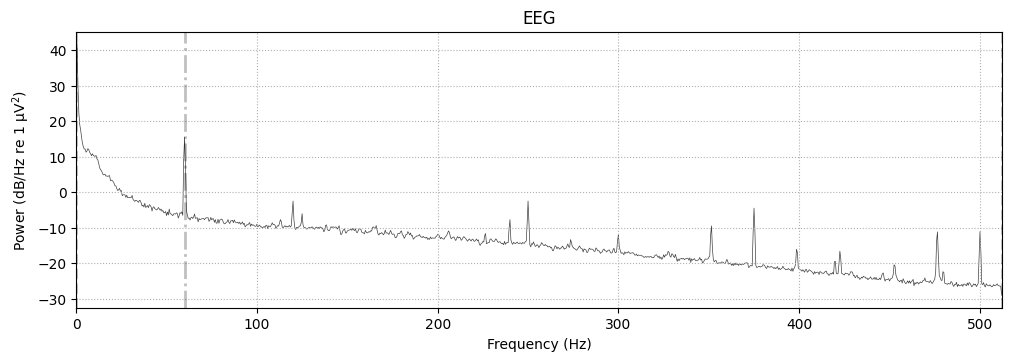

In [25]:
pz_ch = raw.copy().pick(["Cz"])
plt.plot(pz_ch.get_data()[0, :])
pz_ch.compute_psd().plot();

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 s)

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_17441/3641278750.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pz_ch_filtered.compute_psd().plot();
/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


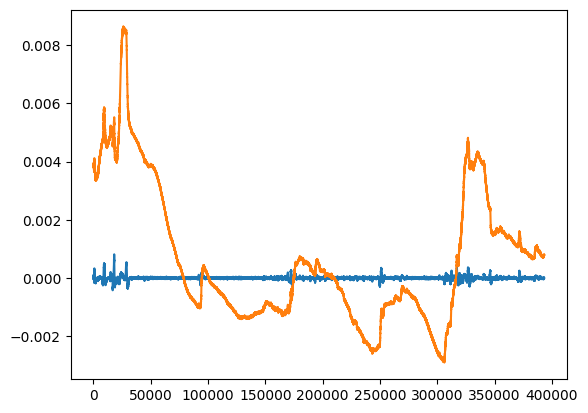

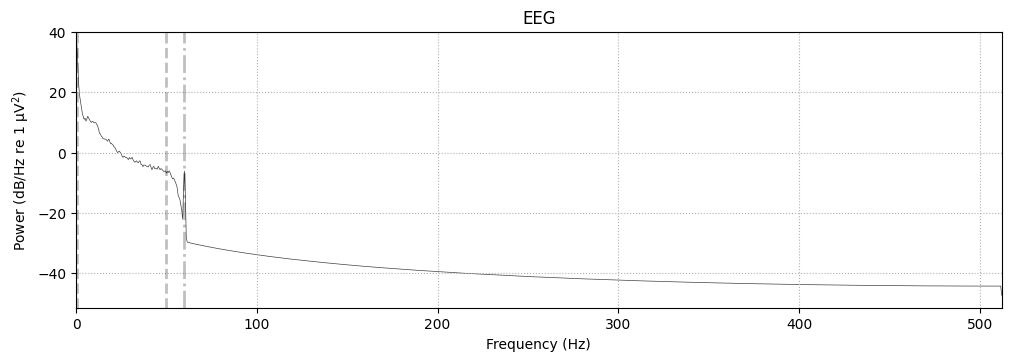

In [43]:
pz_ch_filtered = pz_ch.copy().filter(0.5, 50)
plt.plot(pz_ch_filtered.get_data()[0, :] - np.median(pz_ch_filtered.get_data()[0, :]))
plt.plot(pz_ch.get_data()[0, :] - np.median(pz_ch.get_data()[0, :]))
pz_ch_filtered.compute_psd().plot();